<a href="https://colab.research.google.com/github/Katmalu/hse23_hw1/blob/main/KM_Methylation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ссылка на диск с картированными чтениями


| | SRA accession  | Stage    |
|---:|:-------------|:-----------|
| 1 | SRR5836473  | 8 cell       |
| 2 | SRR3824222 | Epiblast    |
| 3 | SRR5836475  | ICM       |


[Bam-файлы и отчеты](https://drive.google.com/drive/folders/1athn52a93obOwfuHynDCRPRhjAPB80aO?usp=sharing)

# Установка FastQC

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc

--2023-02-13 12:14:45--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  5.16MB/s    in 1.9s    

2023-02-13 12:14:48 (5.16 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introductio

Можно получать данные секвенировия с ENA. Например, https://www.ebi.ac.uk/ena/browser/view/SRR5836473

In [ ]:
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz

--2023-02-13 12:14:48--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq. 100%[===================>]   6.38G  31.3MB/s    in 4m 54s  

2023-02-13 12:19:45 (22.2 MB/s) - ‘SRR5836473_1.fastq.gz’ saved [6856386252]



In [ ]:
!gzip -d SRR5836473_1.fastq.gz
!./FastQC/fastqc SRR5836473_1.fastq

Started analysis of SRR5836473_1.fastq
Approx 5% complete for SRR5836473_1.fastq
Approx 10% complete for SRR5836473_1.fastq
Approx 15% complete for SRR5836473_1.fastq
Approx 20% complete for SRR5836473_1.fastq
Approx 25% complete for SRR5836473_1.fastq
Approx 30% complete for SRR5836473_1.fastq
Approx 35% complete for SRR5836473_1.fastq
Approx 40% complete for SRR5836473_1.fastq
Approx 45% complete for SRR5836473_1.fastq
Approx 50% complete for SRR5836473_1.fastq
Approx 55% complete for SRR5836473_1.fastq
Approx 60% complete for SRR5836473_1.fastq
Approx 65% complete for SRR5836473_1.fastq
Approx 70% complete for SRR5836473_1.fastq
Approx 75% complete for SRR5836473_1.fastq
Approx 80% complete for SRR5836473_1.fastq
Approx 85% complete for SRR5836473_1.fastq
Approx 90% complete for SRR5836473_1.fastq
Approx 95% complete for SRR5836473_1.fastq
Analysis complete for SRR5836473_1.fastq


# Установка Bismark с зависимостями (+bowtie2, samtools)

In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
! conda install -c bioconda bismark

Solving environment: \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bismark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bismark-0.24.0             |       hdfd78af_0         6.6 MB  bioconda
    bowtie2-2.5.1              |   py38h77f66f0_0        14.8 MB  bioconda
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    hisat2-2.2.1               |       h87f3376_4        16.5 MB  bioconda
    k8-0.2.5                   |       hd03093a_2         1.7 MB  bioconda
    libhwloc-2.8.0             |       h32351e8_1       

Можно загрузить файл с google drive напрямую:

In [ ]:
!apt-get install libncurses5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libncurses5
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 96.9 kB of archives.
After this operation, 330 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libncurses5 amd64 6.2-0ubuntu2 [96.9 kB]
Fetched 96.9 kB in 1s (193 kB/s)
Selecting previously unselected package libncurses5:amd64.
(Reading database ... 128048 files and directories currently installed.)
Preparing to unpack .../libncurses5_6.2-0ubuntu2_amd64.deb ...
Unpacking libncurses5:amd64 (6.2-0ubuntu2) ...
Setting up libncurses5:amd64 (6.2-0ubuntu2) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


In [ ]:
! gdown "1A0yrDgfIyBir3fPgT9_mclEZNOUkhCfP&confirm=t"
! gdown "1tnhtwKBO2Fszj-Im30XuuADtO7oIN5-B&confirm=t"
! gdown "1NmzWngRAZvChd1C7JlNkIr2iQShW1BRm&confirm=t"
! gdown "1a-USP32jw0n6L9pRqsbUCjt4j8VopPBg&confirm=t"
! gdown "1q74W3m0bC41q5x29yO2G4tjesLl-1jih&confirm=t" 
! gdown "14vyhf4aKfEPXR2yfK1Rk_f3Muzf1hL40&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1A0yrDgfIyBir3fPgT9_mclEZNOUkhCfP&confirm=t
To: /content/SRR5836473_1_bismark_bt2_pe.bam
100% 667M/667M [00:05<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tnhtwKBO2Fszj-Im30XuuADtO7oIN5-B&confirm=t
To: /content/SRR5836473_1_bismark_bt2_PE_report.txt
100% 1.90k/1.90k [00:00<00:00, 3.03MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NmzWngRAZvChd1C7JlNkIr2iQShW1BRm&confirm=t
To: /content/SRR3824222_1_bismark_bt2_pe.bam
100% 1.56G/1.56G [00:12<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1a-USP32jw0n6L9pRqsbUCjt4j8VopPBg&confirm=t
To: /content/SRR3824222_1_bismark_bt2_PE_report.txt
100% 1.90k/1.90k [00:00<00:00, 2.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=1q74W3m0bC41q5x29yO2G4tjesLl-1jih&confirm=t
To: /content/SRR5836475_1_bismark_bt2_pe.bam
100% 960M/960M [00:07<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=14vyhf4aKfEPXR2yfK1Rk_f3Muzf1hL

In [ ]:
! samtools sort SRR5836473_1_bismark_bt2_pe.bam -o sorted_8cell.bam
! samtools sort SRR3824222_1_bismark_bt2_pe.bam -o sorted_epiblast.bam
! samtools sort SRR5836475_1_bismark_bt2_pe.bam -o sorted_ICM.bam

[bam_sort_core] merging from 5 files...
[bam_sort_core] merging from 11 files...
[bam_sort_core] merging from 7 files...


In [ ]:
! samtools index  sorted_8cell.bam
! samtools index  sorted_epiblast.bam
! samtools index  sorted_ICM.bam

Сколько ридов закартировалось на регион 11347700-11367700 в образце 

In [ ]:
print("8cell: ")
! samtools view sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
print("epiblast: ")
! samtools view sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
print("ICM: ")
! samtools view sorted_ICM.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l

8cell: 
1090
epiblast: 
2328
ICM: 
1456


Сколько ридов закартировалось на регион 40185800-40195800 в образце 

In [ ]:
print("8cell: ")
! samtools view sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
print("epiblast: ")
! samtools view sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l
print("ICM: ")
! samtools view sorted_ICM.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

8cell: 
464
epiblast: 
1062
ICM: 
630


Дедупликация

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_8_cell  SRR5836473_1_bismark_bt2_pe.bam
! deduplicate_bismark  --bam  --paired  -o s_epiblast  SRR3824222_1_bismark_bt2_pe.bam
! deduplicate_bismark  --bam  --paired  -o s_ICM  SRR5836475_1_bismark_bt2_pe.bam

Output filename was given as: s_8_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR5836473_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836473_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836473_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_8_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:122082543
skipping header line:	@PG	ID:Bismark	VN:v0.23.1dev	CL:"bismark -p 2 --gzip mouse_chr -1 data/SRR5836473_1.fastq.gz -2 data/SRR5836473_2.fastq.gz -o cell8/"

Total number of alignments analysed in SRR5836473_1_bismark_bt2_pe.bam:	2850231
Total number duplicated alignments removed:	521904 (18.31%)
Duplicated alignments were 

In [ ]:
! gdown "1Gh6YYO8zmCiUfZ4ShVcvFp3J_gXjnoOF&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Gh6YYO8zmCiUfZ4ShVcvFp3J_gXjnoOF&confirm=t
To: /content/mouse_chr.zip
100% 366M/366M [00:03<00:00, 107MB/s]


In [ ]:
! unzip mouse_chr.zip

Archive:  mouse_chr.zip
   creating: mouse_chr/
   creating: mouse_chr/Bisulfite_Genome/
   creating: mouse_chr/Bisulfite_Genome/CT_conversion/
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/genome_mfa.CT_conversion.fa  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.4.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.1.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.3.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.rev.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.rev.1.bt2  
   creating: mouse_chr/Bisulfite_Genome/GA_conversion/
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.rev.1.bt2  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.rev.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/genome_mfa.GA_conversion.fa  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.4.bt2  
  inf

Время работы: ±30 мин

Коллинг метилирования

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_8_cell.deduplicated.bam
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_epiblast.deduplicated.bam
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_ICM.deduplicated.bam


 *** Bismark methylation extractor version v0.24.0 ***

Trying to determine the type of mapping from the SAM header line of file s_8_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine posit

In [ ]:
! bismark2report --alignment_report SRR5836473_1_bismark_bt2_PE_report.txt --dedup_report s_8_cell.deduplication_report.txt --mbias_report s_8_cell.deduplicated.M-bias.txt --splitting_report s_8_cell.deduplicated_splitting_report.txt


User specifified dedup report: s_8_cell.deduplication_report.txt

Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836473_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836473_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> s_8_cell.deduplication_report.txt <
Processing deduplication report s_8_cell.deduplication_report.txt ...
Complete

Using the following splitting report:		> s_8_cell.deduplicated_splitting_report.txt <
Processing splitting report s_8_cell.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> s_8_cell.deduplicated.M-bias.txt <
Processing M-bias report s_8_cell.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [ ]:
! bismark2report --alignment_report SRR3824222_1_bismark_bt2_PE_report.txt --dedup_report s_epiblast.deduplication_report.txt --mbias_report s_epiblast.deduplicated.M-bias.txt --splitting_report s_epiblast.deduplicated_splitting_report.txt


User specifified dedup report: s_epiblast.deduplication_report.txt

Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> s_epiblast.deduplication_report.txt <
Processing deduplication report s_epiblast.deduplication_report.txt ...
Complete

Using the following splitting report:		> s_epiblast.deduplicated_splitting_report.txt <
Processing splitting report s_epiblast.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> s_epiblast.deduplicated.M-bias.txt <
Processing M-bias report s_epiblast.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [ ]:
! bismark2report --alignment_report SRR5836475_1_bismark_bt2_PE_report.txt --dedup_report s_ICM.deduplication_report.txt --mbias_report s_ICM.deduplicated.M-bias.txt --splitting_report s_ICM.deduplicated_splitting_report.txt


User specifified dedup report: s_ICM.deduplication_report.txt

Writing Bismark HTML report to >> SRR5836475_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836475_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836475_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> s_ICM.deduplication_report.txt <
Processing deduplication report s_ICM.deduplication_report.txt ...
Complete

Using the following splitting report:		> s_ICM.deduplicated_splitting_report.txt <
Processing splitting report s_ICM.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> s_ICM.deduplicated.M-bias.txt <
Processing M-bias report s_ICM.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [ ]:
! pip install pyGenomeTracks
! pip install -U ipykernel
! conda install -c bioconda ucsc-fetchchromsizes
! conda install -c bioconda ucsc-bedgraphtobigwig
! apt-get install bedtools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 636.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.3/784.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
!gzip -d s_8_cell.deduplicated.bismark.cov.gz
!gzip -d s_epiblast.deduplicated.bismark.cov.gz
!gzip -d s_ICM.deduplicated.bismark.cov.gz

In [33]:
!head s_8_cell.deduplicated.bismark.cov

chr11	3100031	3100031	50	1	1
chr11	3100048	3100048	66.6666666666667	2	1
chr11	3100049	3100049	50	1	1
chr11	3100224	3100224	87.5	7	1
chr11	3100225	3100225	53.3333333333333	8	7
chr11	3100286	3100286	66.6666666666667	6	3
chr11	3100287	3100287	33.3333333333333	5	10
chr11	3100310	3100310	62.5	5	3
chr11	3100311	3100311	50	7	7
chr11	3100349	3100349	55.5555555555556	5	4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
head = ["chr", "start", "end", "M%", "met", "nonmet"]

In [ ]:
cell8 = pd.read_csv("s_8_cell.deduplicated.bismark.cov", sep = "\t", names = head)
epiblast = pd.read_csv("s_epiblast.deduplicated.bismark.cov", sep = "\t", names = head)
ICM = pd.read_csv("s_ICM.deduplicated.bismark.cov", sep = "\t", names = head)

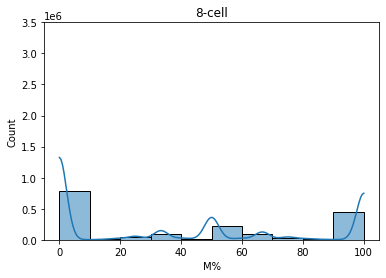

In [66]:
a = sns.histplot(data=cell8, kde=True, x="M%", bins=10)
a.set_title("8-cell")
a.set(ylim=(0,3500000))
plt.show()

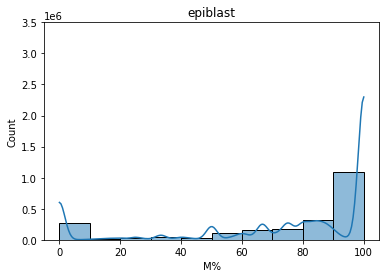

In [26]:
a = sns.histplot(data=epiblast, kde=True, x="M%", bins=10)
a.set_title("epiblast")
a.set(ylim=(0,2000000))
plt.show()

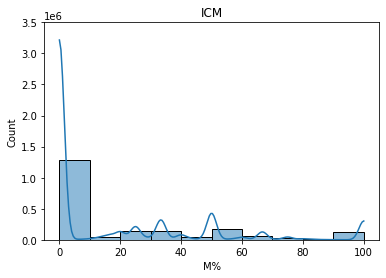

In [27]:
a = sns.histplot(data=ICM, kde=True, x="M%", bins=10)
a.set_title("ICM")
a.set(ylim=(0,3500000))
plt.show()

In [36]:
!wget http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes

--2023-02-13 19:10:12--  http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1405 (1.4K)
Saving to: ‘mm10.chrom.sizes’

mm10.chrom.sizes    100%[===================>]   1.37K  --.-KB/s    in 0s      

2023-02-13 19:10:12 (139 MB/s) - ‘mm10.chrom.sizes’ saved [1405/1405]



In [40]:
!gzip -d s_8_cell.deduplicated.bedGraph.gz
!gzip -d s_epiblast.deduplicated.bedGraph.gz
!gzip -d s_ICM.deduplicated.bedGraph.gz

In [43]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl1.0/libssl1.0.0_1.0.2n-1ubuntu5.10_amd64.deb
!sudo apt-get install /content/libssl1.0.0_1.0.2n-1ubuntu5.10_amd64.deb

--2023-02-13 19:16:51--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl1.0/libssl1.0.0_1.0.2n-1ubuntu5.10_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.39, 91.189.91.39, 185.125.190.36, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.39|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-02-13 19:16:51 ERROR 404: Not Found.

Reading package lists... Done
E: Unsupported file /content/libssl1.0.0_1.0.2n-1ubuntu5.10_amd64.deb given on commandline


In [46]:
! conda install -c bioconda ucsc-bedgraphtobigwig

! wget http://snapshot.debian.org/archive/debian/20190501T215844Z/pool/main/g/glibc/multiarch-support_2.28-10_amd64.deb
! sudo dpkg -i multiarch-support*.deb

! wget http://snapshot.debian.org/archive/debian/20170705T160707Z/pool/main/o/openssl/libssl1.0.0_1.0.2l-1%7Ebpo8%2B1_amd64.deb
! sudo dpkg -i libssl1.0.0*.deb

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.

--2023-02-13 19:21:24--  http://snapshot.debian.org/archive/debian/20190501T215844Z/pool/main/g/glibc/multiarch-support_2.28-10_amd64.deb
Resolving snapshot.debian.org (snapshot.debian.org)... 185.17.185.185, 193.62.202.27, 2001:630:206:4000:1a1a:0:c13e:ca1b, ...
Connecting to snapshot.debian.org (snapshot.debian.org)|185.17.185.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215080 (210K)
Saving to: ‘multiarch-support_2.28-10_amd64.deb’

multiarch-support_2 100%[===================>] 210.04K   472KB/s    in 0.4s    

2023-02-13 19:21:25 (472 KB/s) - ‘multiarch-support_2.28-10_amd64.deb’ saved [215080/215080]

Selecting previously unselected package multiarch-support.
(Reading database ... 128110 files and directories currently installed.)
Preparing to unpack multiarch-support_2.28-10_amd64.deb .

In [56]:
! bedGraphToBigWig  s_8_cell.deduplicated.bedGraph mm10.chrom.sizes cell8_methylation.bigWig

In [57]:
! bedtools genomecov -bg -ibam s_8_cell.deduplicated.bam -g mm10.chromSizes  >  s_8_cell.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [58]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph mm10.chrom.sizes cell8_coverage.bigWig

In [59]:
! bedGraphToBigWig  s_epiblast.deduplicated.bedGraph mm10.chrom.sizes epiblast_methylation.bigWig
! bedtools genomecov -bg -ibam s_epiblast.deduplicated.bam -g mm10.chromSizes  >  s_epiblast.cover.bedGraph
! bedGraphToBigWig   s_epiblast.cover.bedGraph mm10.chrom.sizes epiblast_coverage.bigWig


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [60]:
! bedGraphToBigWig  s_ICM.deduplicated.bedGraph mm10.chrom.sizes ICM_methylation.bigWig
! bedtools genomecov -bg -ibam s_ICM.deduplicated.bam -g mm10.chromSizes  >  s_ICM.cover.bedGraph
! bedGraphToBigWig   s_ICM.cover.bedGraph mm10.chrom.sizes ICM_coverage.bigWig


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [64]:
! pyGenomeTracks --tracks tracks.ini.txt --region chr11:3100030-3500030 -o image_cov.png

INFO:pygenometracks.tracksClass:initialize 1. [cell8_coverage]
INFO:pygenometracks.tracksClass:initialize 2. [cell8_methylation]
INFO:pygenometracks.tracksClass:initialize 3. [epiblast_coverage]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_methylation]
INFO:pygenometracks.tracksClass:initialize 5. [ICM_coverage]
INFO:pygenometracks.tracksClass:initialize 6. [ICM_methylation]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.003810882568359375
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 25.531914893617024. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [cell8_coverage]
INFO:pygenometracks.tracksClass:plotting 2. [cell8_methylation]
INFO:pygenometracks.tracksClass:plotting 3. [epiblast_coverage]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_methylation]
INFO:pygenometracks.tracksClass:plotting 5. [ICM_coverage]
INFO:pygenometracks.tracksClass:plotting 6. [ICM_methylation]
